In [1]:
# project: p5
# submitter: swu427
# partner: none
# hours: 20

In [2]:
import json    
import zipfile
from io import TextIOWrapper
import csv
import pandas as pd
from edgar_utils import lookup_region
from edgar_utils import Filing
from graphviz import Graph, Digraph
import geopandas as gpd
import re
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, box
import matplotlib.colors as mcolors

In [3]:
#Q1
zf = zipfile.ZipFile("server_log.zip")
f = zf.open("rows.csv")
df = pd.read_csv(TextIOWrapper(f))

int(sum(df["size"]))



24801002666

In [4]:
#Q2
requests = df.groupby("ip")['ip'].size()
ip_dict = requests.to_dict()
sorted_dict = dict(sorted(ip_dict.items(), key=lambda item: item[1], reverse = True)[:10])
sorted_dict

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [5]:
#Q3
len(df[df['code'] >= 400]) / len(df)

0.03466852724527611

In [6]:
#Q4
file_counts = df.groupby(['cik', 'accession', 'extention']).size()
most_frequent_file = file_counts.idxmax()
result_string = f"{int(most_frequent_file[0])}/{most_frequent_file[1]}/{most_frequent_file[2]}"
result_string

'1627631/0001627631-15-000004/.txt'

In [7]:
#Q5
# df
crawlers = df.groupby("crawler")["crawler"].size()
crawlers_dict = crawlers.to_dict()
value_of_1 = crawlers_dict[1.0]
value_of_1

971

In [8]:
#Q6
most_common = df.groupby("ip")["ip"].size()
most_common_dict = most_common.to_dict()
empty_dict = {}
for ip in most_common_dict:
    if lookup_region(ip) not in empty_dict:
        empty_dict[lookup_region(ip)] = 1
    else:
        empty_dict[lookup_region(ip)] += 1
empty_dict
key_with_largest_value = max(empty_dict, key=empty_dict.get)
key_with_largest_value

'United States of America'

In [9]:
#Q7
high_volume_ips = {}
total_ips = {}

for ip, count in df.groupby("ip")["ip"].size().to_dict().items():
    region = lookup_region(ip)
    
    if count > 1000:
        if region in high_volume_ips:
            high_volume_ips[region] += 1
        else:
            high_volume_ips[region] = 1
    if region in total_ips:
        total_ips[region] += 1
    else:
        total_ips[region] = 1


fractions = {}

for region in total_ips:
    total_ip_count = total_ips[region]
    if region in high_volume_ips:
        high_volume_ip_count = high_volume_ips[region]
    else:
        high_volume_ip_count = 0
    
    if total_ip_count > 0:
        fractions[region] = high_volume_ip_count / total_ip_count
    else:
        fractions[region] = 0
fractions



{'Australia': 0.07692307692307693,
 'Taiwan (Province of China)': 0.0,
 'China': 0.006864988558352402,
 'India': 0.058823529411764705,
 'Korea (Republic of)': 0.2,
 'Hong Kong': 0.0,
 'Viet Nam': 0.0,
 'Malaysia': 0.0,
 'United States of America': 0.019862490450725745,
 'Singapore': 0.0,
 'Canada': 0.017857142857142856,
 'Sweden': 0.0,
 'Algeria': 0.0,
 'South Africa': 0.0,
 'Ireland': 0.3125,
 'France': 0.0036900369003690036,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Romania': 0.0,
 'Netherlands': 0.0,
 'Finland': 0.0,
 'Russian Federation': 0.0,
 'Ukraine': 0.0,
 'Philippines': 0.0,
 'Japan': 0.0,
 'Bangladesh': 0.0,
 'Estonia': 0.0,
 '-': 0.0,
 'Germany': 0.0,
 'Brazil': 0.0,
 'Italy': 0.0,
 'Angola': 0.0,
 'Poland': 0.0,
 'Egypt': 0.0,
 'Morocco': 0.0,
 'Thailand': 0.0,
 'Switzerland': 0.0,
 'Yemen': 0.0,
 'Israel': 0.0,
 'Denmark': 0.0,
 'Iraq': 0.0,
 'Greece': 0.0,
 'Venezuela (Bolivarian Republic of)': 0.0,
 'Honduras': 0.0,
 'Hungary': 0.0,

In [10]:
#Q8
zip_file_path = "docs.zip"
filings_dict = {}

with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    for file_info in zip_file.infolist():
        if file_info.filename.lower().endswith(('.htm', '.html')):
            with zip_file.open(file_info.filename, 'r') as html_file:
                html_content = html_file.read().decode('utf-8')
                filing_object = Filing(html_content)
                filings_dict[file_info.filename] = filing_object

if "850693/0000850693-07-000159/-index.htm" in filings_dict:
    dates = filings_dict["850693/0000850693-07-000159/-index.htm"].dates
dates

    

['2007-07-25', '2007-07-25', '2007-07-23']

In [11]:
#Q9
state_distribution = {}

for file in filings_dict:
    states_abr = filings_dict[file].state()
    if states_abr not in state_distribution:
        if states_abr is not None:
            state_distribution[states_abr] = 1
    else:
        state_distribution[states_abr] += 1
state_distribution

{'CA': 92,
 'NJ': 23,
 'MS': 1,
 'MA': 30,
 'CO': 25,
 'NY': 83,
 'TX': 67,
 'FL': 21,
 'AL': 1,
 'IN': 5,
 'CT': 14,
 'UT': 5,
 'MD': 13,
 'KS': 5,
 'VA': 15,
 'OH': 10,
 'SD': 1,
 'DE': 9,
 'IL': 25,
 'GA': 9,
 'NC': 9,
 'PA': 25,
 'TN': 4,
 'MN': 15,
 'NM': 1,
 'KY': 2,
 'OK': 7,
 'AR': 1,
 'NV': 6,
 'VT': 1,
 'MO': 4,
 'MI': 11,
 'NE': 2,
 'IA': 6,
 'AZ': 5,
 'WI': 9,
 'LA': 2,
 'ID': 1,
 'OR': 2,
 'WV': 2,
 'WA': 3,
 'DC': 1,
 'ME': 1}

In [12]:
#Q10
sic_distribution = {}
for file in filings_dict:
    sic = filings_dict[file].sic
    if sic not in sic_distribution:
        if sic is not None:
            sic_distribution[sic] = 1
    else:
        sic_distribution[sic] += 1
sic_distribution

{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

In [13]:
#Q11
requests_distribution = {}

for index, row in df.iterrows():
    file_key = f"{int(row['cik'])}/{row['accession']}/{row['extention']}"
    if file_key in filings_dict:
        sic = filings_dict[file_key].sic
        if sic not in requests_distribution:
            if sic is not None:
                requests_distribution[sic] = 1
        else:
            requests_distribution[sic] +=1

requests_distribution

{4931: 70,
 1000: 273,
 6021: 204,
 7371: 229,
 2860: 226,
 6211: 237,
 2834: 984,
 1389: 656,
 4522: 22,
 6282: 171,
 6022: 379,
 1700: 31,
 6331: 91,
 4813: 4,
 2836: 429,
 3620: 50,
 1311: 550,
 4841: 108,
 3272: 81,
 7200: 94,
 6513: 38,
 7374: 94,
 3510: 66,
 4512: 42,
 3826: 56,
 3678: 4,
 4911: 8,
 2510: 171,
 6798: 90,
 7830: 62,
 3571: 6,
 6221: 85,
 3621: 38,
 3695: 55,
 3590: 24,
 6321: 21,
 4812: 4,
 3312: 31,
 3842: 87,
 2870: 2,
 4955: 23,
 7370: 39,
 1040: 2,
 900: 39,
 4833: 7,
 6029: 83,
 3990: 34,
 5311: 90,
 5944: 33,
 3663: 23,
 8742: 27,
 5621: 99,
 8090: 32,
 4412: 43,
 8731: 25,
 7373: 48,
 8711: 2,
 6411: 3,
 3669: 2,
 5172: 36,
 3825: 164,
 3559: 20,
 2080: 1,
 3541: 1,
 7389: 26,
 2711: 1,
 7812: 25,
 7350: 1,
 1400: 3,
 5900: 35,
 3829: 73,
 5812: 19,
 3845: 2,
 6770: 2,
 3841: 14,
 7990: 1,
 2911: 1,
 6799: 46,
 1382: 2,
 3679: 5,
 3721: 1,
 5122: 34,
 5990: 1,
 1531: 4,
 5731: 1,
 5531: 1,
 6324: 30,
 2750: 1,
 4213: 35,
 1381: 31,
 2030: 1,
 3714: 1,
 7372

In [14]:
#Q12
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour
hour_requests = df["hour"].value_counts().to_dict()
hour_requests

/tmp/ipykernel_65846/1432697922.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


{9: 11033,
 5: 9783,
 3: 8850,
 2: 8550,
 4: 8343,
 0: 8305,
 8: 8292,
 1: 8242,
 7: 8213,
 6: 7761,
 14: 6654,
 15: 6512,
 17: 6487,
 11: 6435,
 10: 6377,
 18: 6356,
 23: 6283,
 19: 6211,
 21: 6164,
 12: 6155,
 22: 6098,
 20: 6066,
 13: 6006,
 16: 5680}

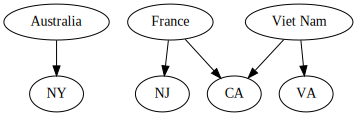

In [15]:
#Q13
target_countries = ["Australia", "France", "Viet Nam"]
filtered_df = df[df['ip'].apply(lambda ip: lookup_region(ip) in target_countries)]
g = Digraph()

# Add nodes for the countries
for country in target_countries:
    g.node(country)

added_edges = set()
for _, row in filtered_df.iterrows():
    ip_country = lookup_region(row['ip'])
    if ip_country in target_countries:
        file_key = f"{int(row['cik'])}/{row['accession']}/{row['extention']}"
        filing_object = filings_dict.get(file_key)
        if filing_object:
            state = filing_object.state()
            if state:
                # Check if the edge exists in the set before adding it to the Digraph
                edge = (ip_country, state)
                if edge not in added_edges:
                    g.node(state)
                    g.edge(*edge)
                    added_edges.add(edge)
g

In [16]:
#Q14
common_street_addr = {}

for index, row in df.iterrows():
    file_key = f"{int(row['cik'])}/{row['accession']}/{row['extention']}"
    if file_key in filings_dict:
        street_addr_list = filings_dict[file_key].addresses
        for street_addr in street_addr_list:
            if street_addr in common_street_addr:
                common_street_addr[street_addr] += 1
            else:
                common_street_addr[street_addr] = 1

common_street_addr_filtered = {addr: count for addr, count in common_street_addr.items() if count >= 300}


common_street_addr_filtered

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305}

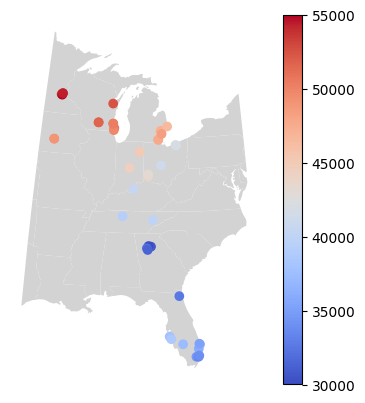

In [17]:
#Q15 

locations = gpd.read_file("locations.geojson")
us_shape = gpd.read_file("shapes/cb_2018_us_state_20m.shp")

def extract_postal_codes(address):
    postal_codes = re.findall(r"(\d{5}|\d{9})", address)
    return postal_codes[0] if postal_codes else None

locations["postal_code"] = locations["address"].apply(extract_postal_codes)

valid_locations = locations[locations["postal_code"].notna()]
valid_locations = valid_locations[(valid_locations["postal_code"].astype(int) >= 30000) & (valid_locations["postal_code"].astype(int) <= 60000)]

b = box(-95, 25, -75, 50)

us_shape_cropped = us_shape.intersection(b).to_crs("epsg:2022")

ax = us_shape_cropped.plot(color="lightgray")


valid_locations_intersection = valid_locations[valid_locations.intersects(b)].to_crs("epsg:2022")
valid_locations_intersection.plot(column="postal_code", cmap="coolwarm", legend = False, ax=ax)

cmap = plt.cm.coolwarm
norm = mcolors.Normalize(vmin=30000, vmax=55000)
cb = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax)
ax.set_axis_off()
#https://stackoverflow.com/questions/51204505/python-barplot-with-colorbar to help with making the color bar